# Exploratory Data Analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1.1 Load Data

In [8]:
train = pd.read_csv("train.csv")
val = pd.read_csv("val.csv")

explore = pd.concat([train, val], axis=0)

explore.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4468400169         1               18                   0               0   
1  4462377853         0              123                   2               1   
2  4461787791         1               89                   3               1   
3  4497751825         0               17                   3               1   
4  4521575223         1              146                   1               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          3           4            4                  1            1  ...   
1          6           6            6                  0            0  ...   
2          7           5            7                  1            1  ...   
3          7          10            5                  0            0  ...   
4         11           7            9                  0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         15644          7.0               17861   
1                   0         15950          7.0               18377   
2                   0         15586          7.0               17668   
3                   0         18178          6.4               16533   
4                   0         17956          6.8               18421   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    246                           51          987   
1                    216                           49         -428   
2                    193                           60        -1902   
3                    181                           52         2827   
4                    226                           73         -564   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                555         24.6         1564.4  
1                558         21.6         1595.0  
2               -967         19.3         1558.6  
3               2675         18.1         1817.8  
4               -633         22.6         1795.6  

[5 rows x 40 columns]

# 2.1 Look At Correlations

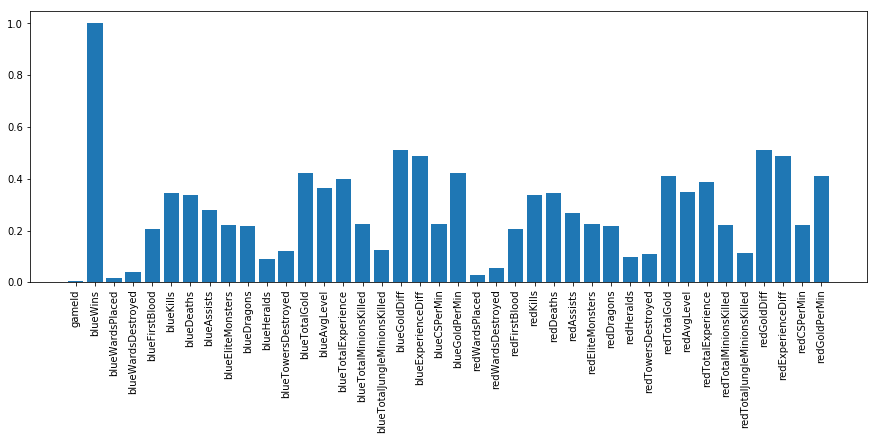

In [9]:
plt.figure(figsize=(15, 5))
plt.bar(explore.columns, abs(explore.corr()["blueWins"]))
plt.xticks(rotation=90)
plt.show()

# 3.3 Are The Team Colors Equal In Stats

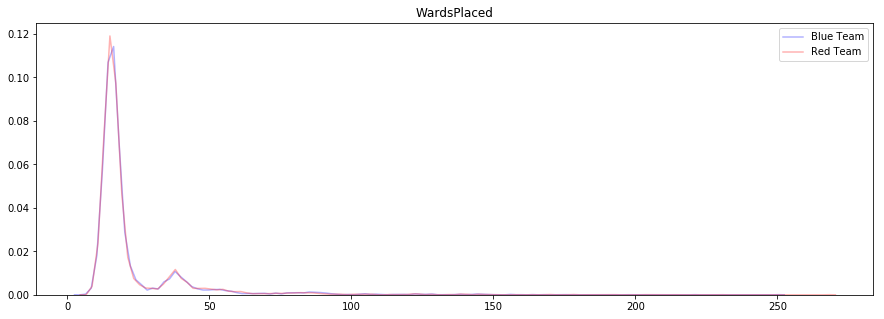

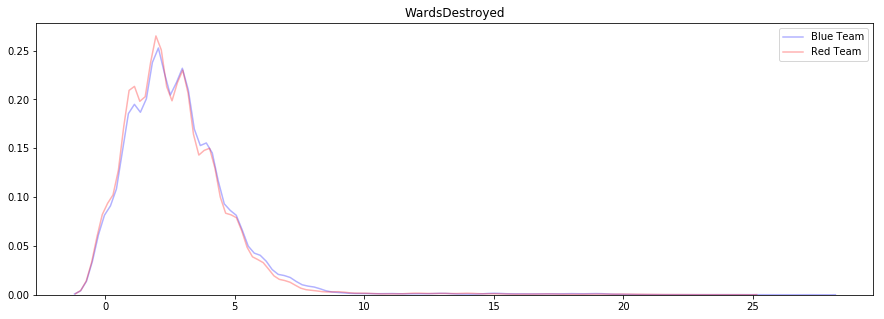

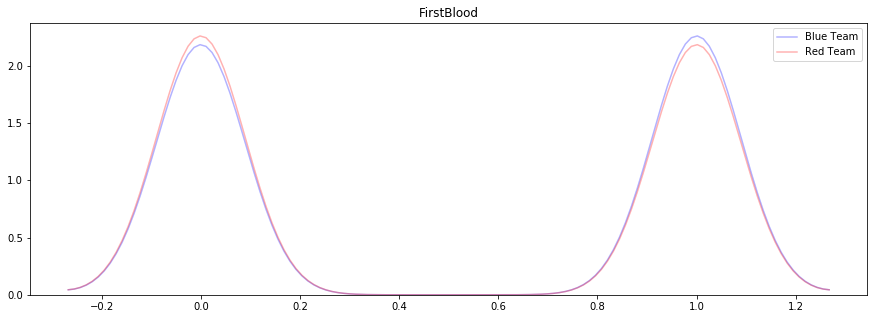

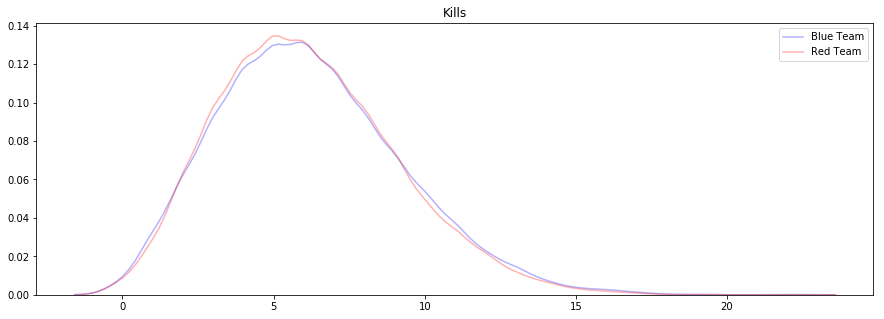

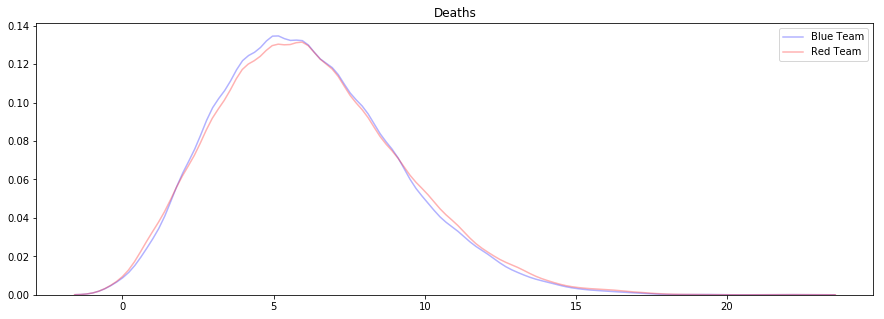

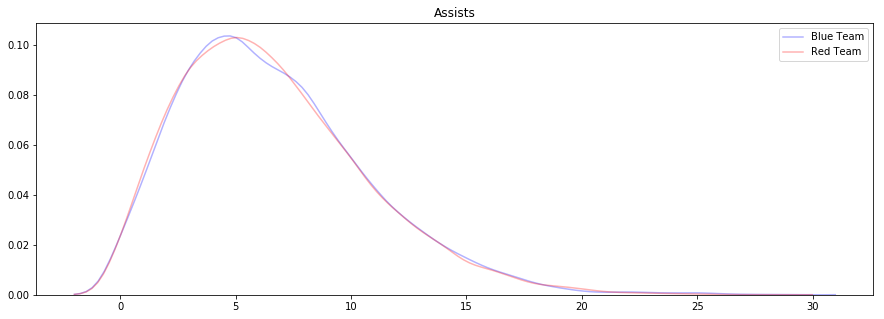

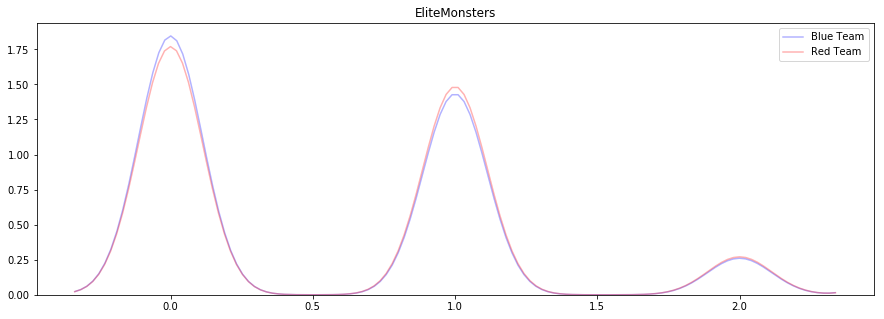

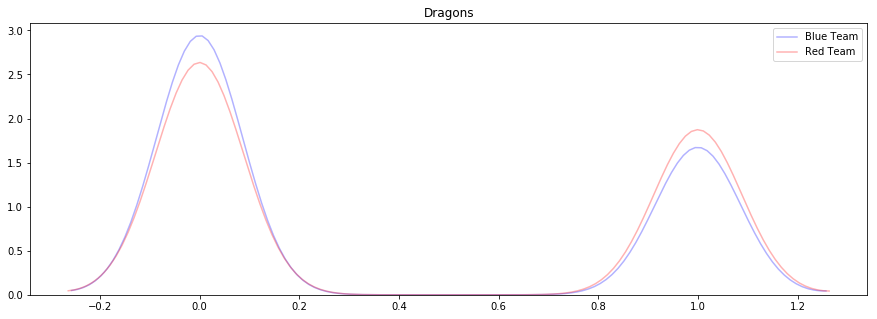

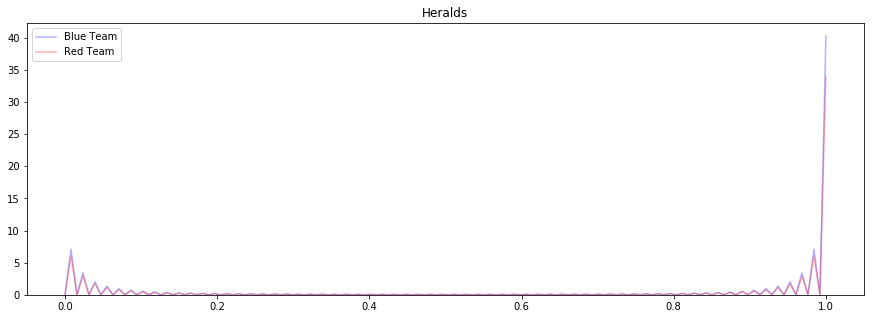

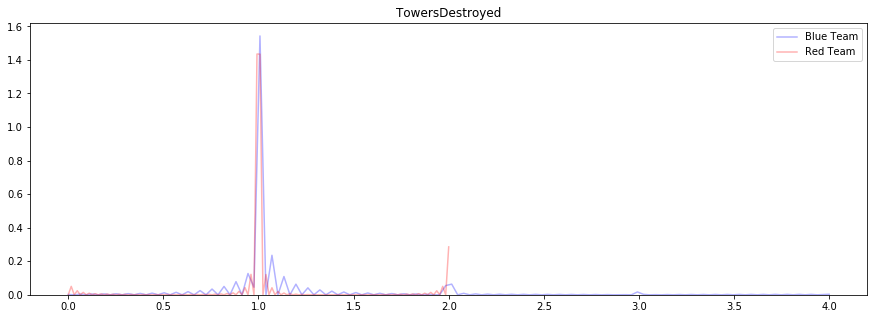

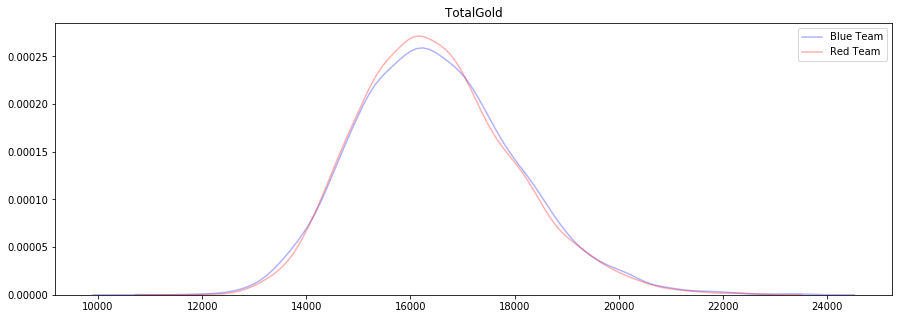

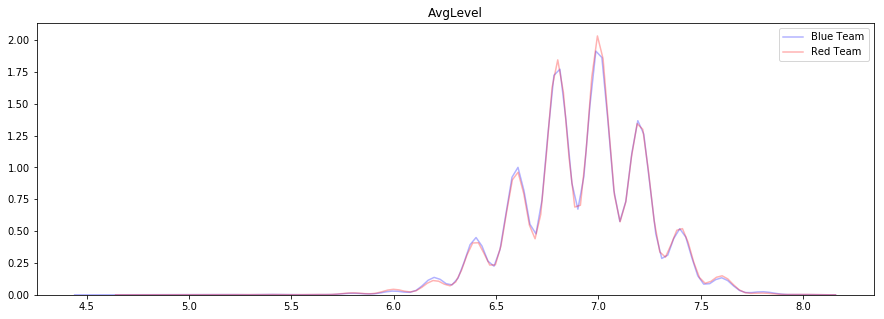

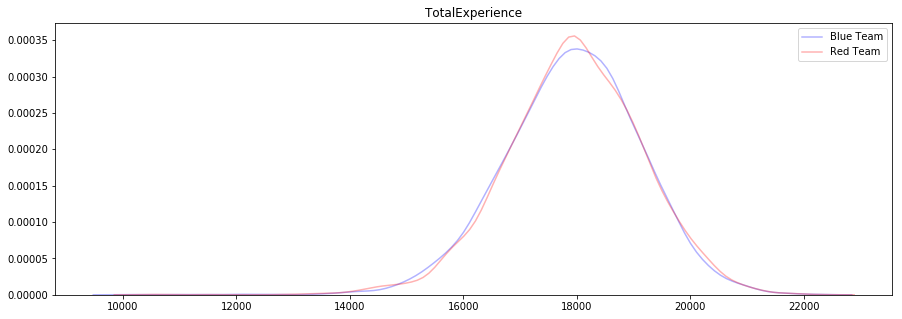

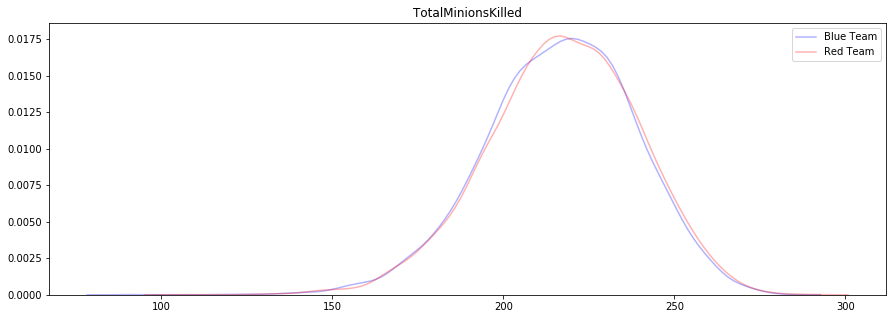

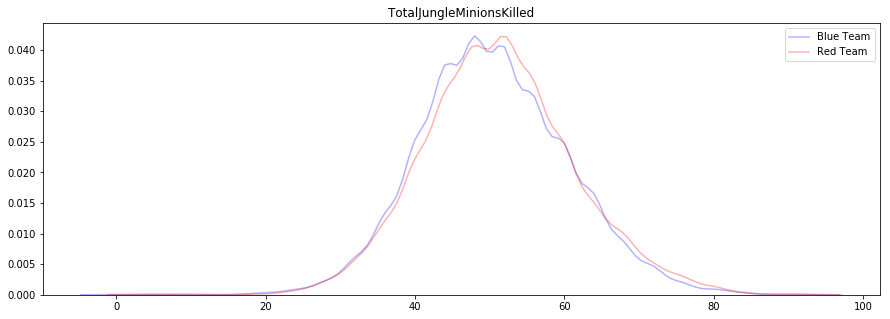

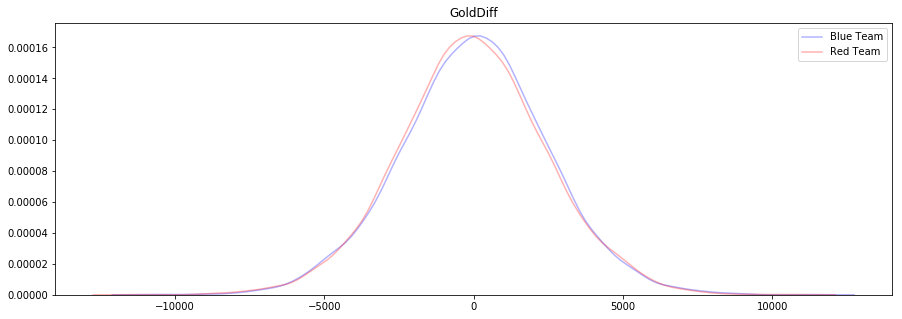

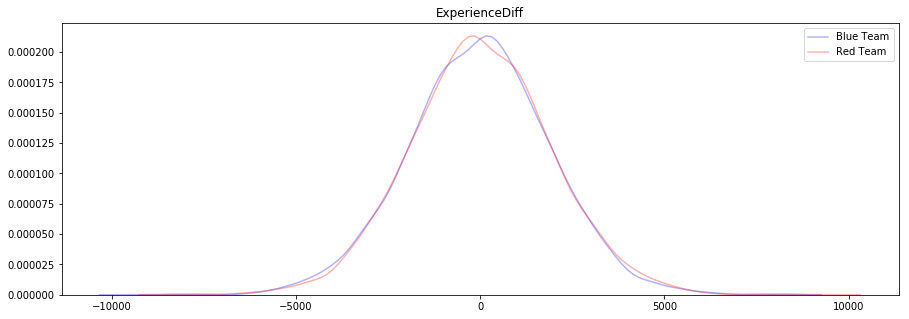

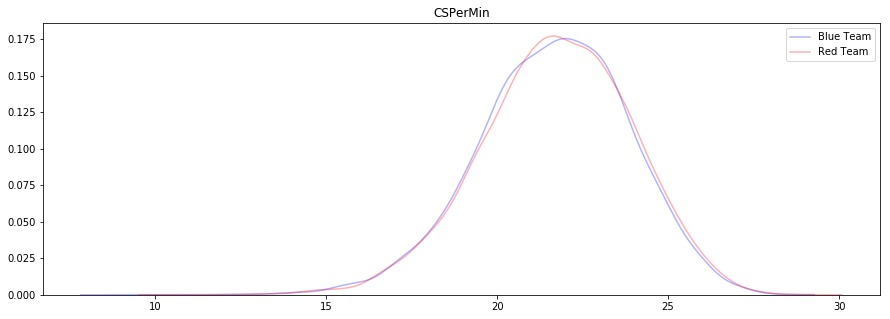

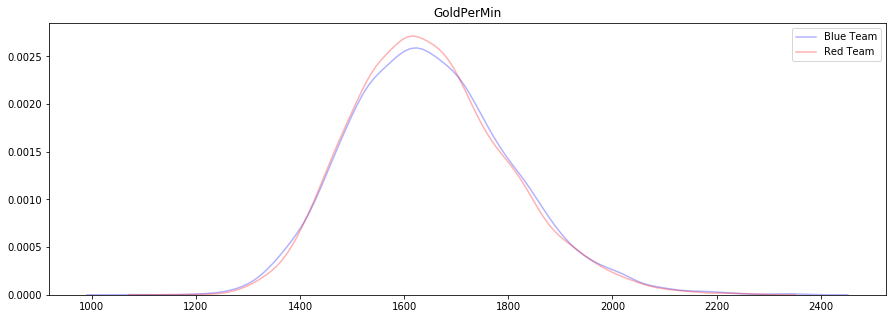

In [10]:
for col1 in explore.columns:
    if col1.startswith("blue"):
        for col2 in explore.columns:
            if col2 == "red" + col1[4:]:
                plt.figure(figsize=(15, 5))
                sns.kdeplot(explore[col1], color="Blue", label="Blue Team", alpha=.3)
                sns.kdeplot(explore[col2], color="Red", label="Red Team", alpha=.3)
                plt.title(col1[4:])
                plt.legend()
                plt.show()

As Expected the data seems to be extremely balanced across teams.

# Stat Differences for when blue team wins

In [11]:
blue = explore[explore.blueWins == 1]

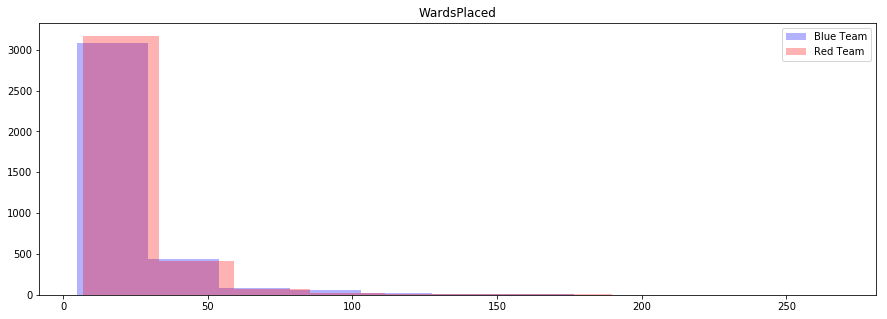

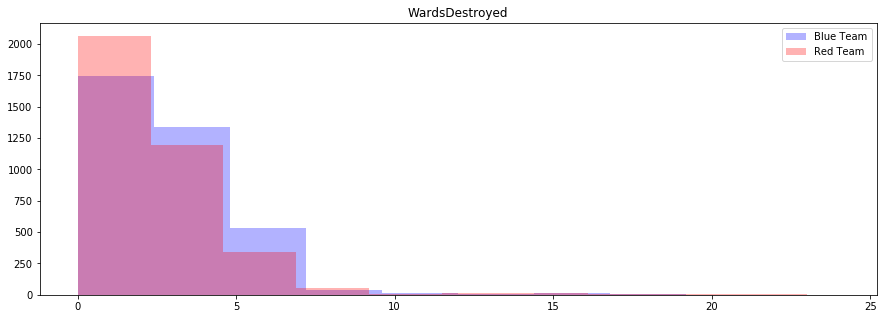

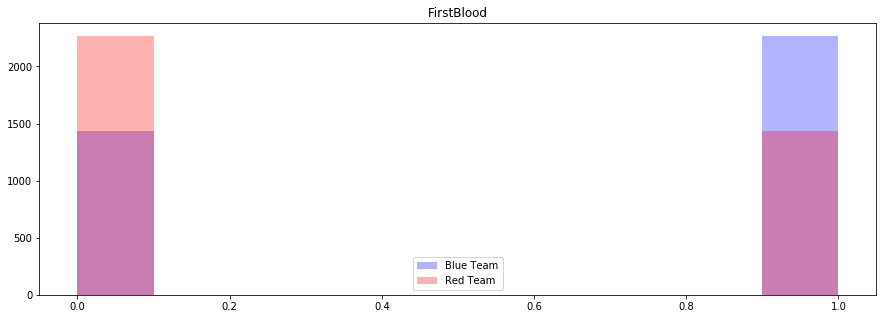

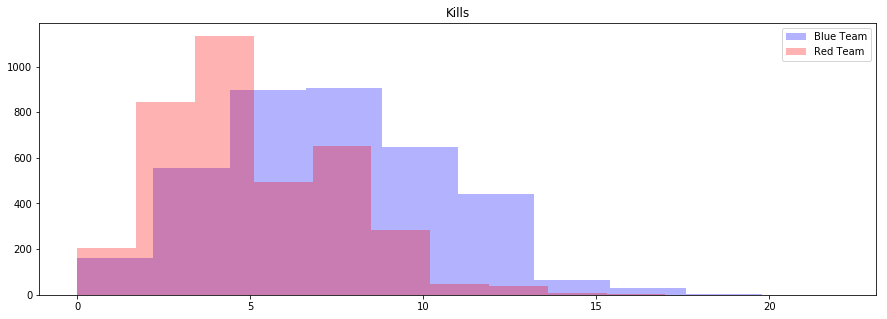

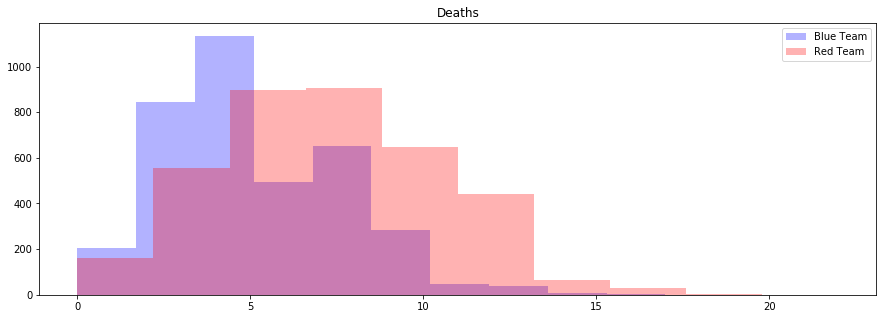

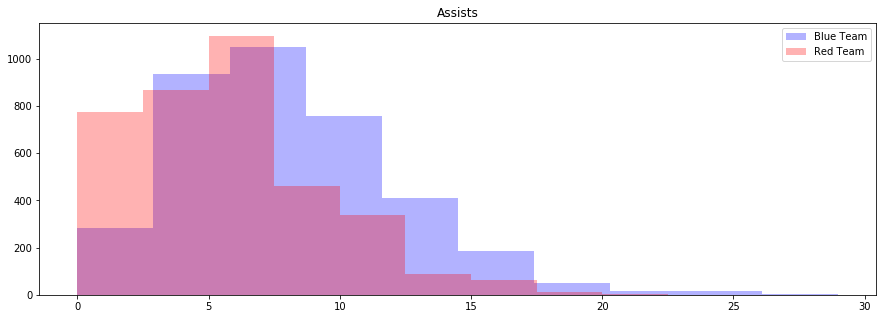

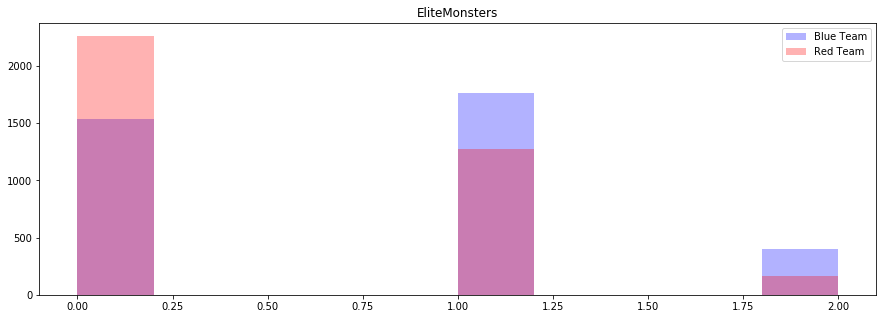

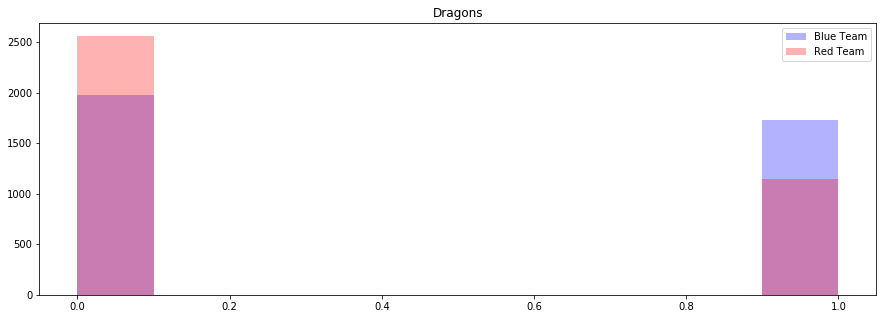

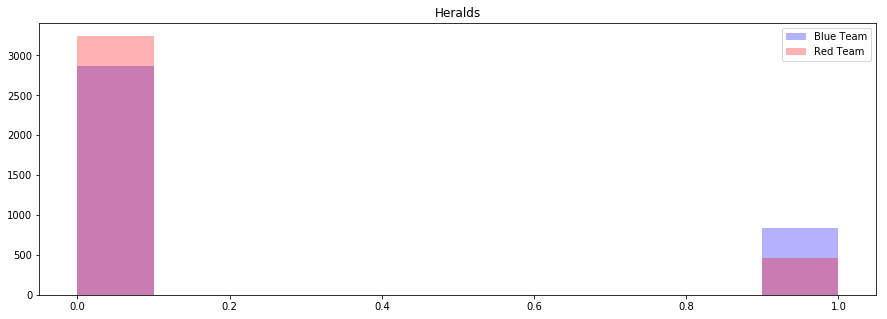

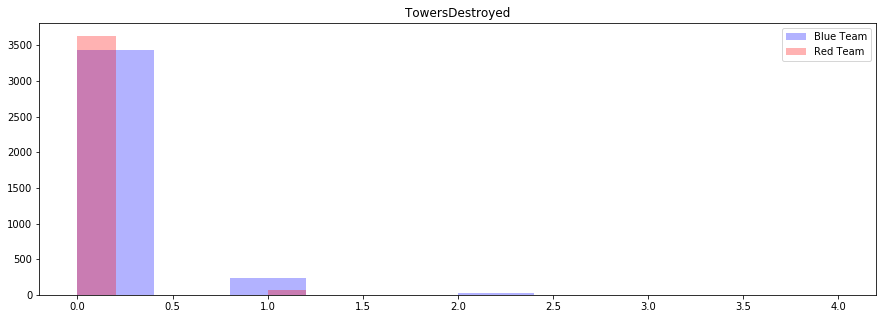

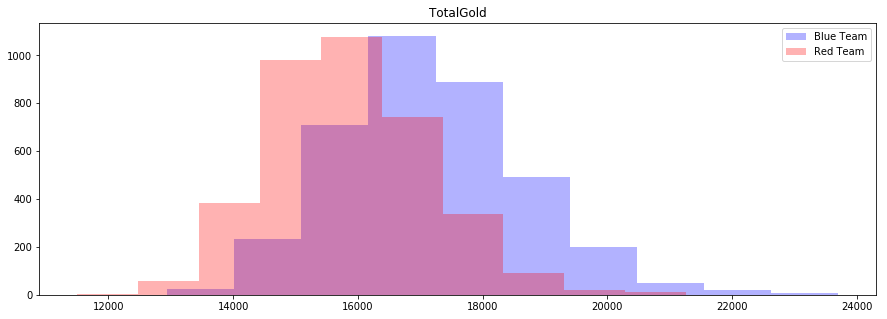

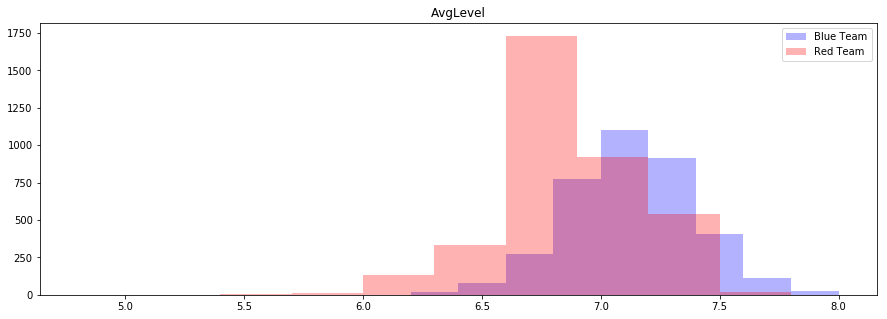

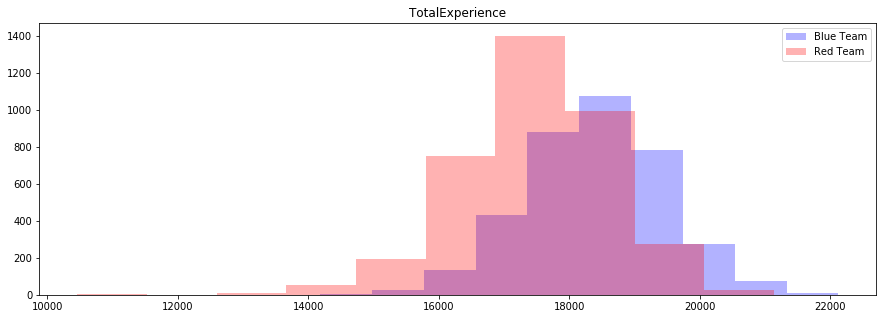

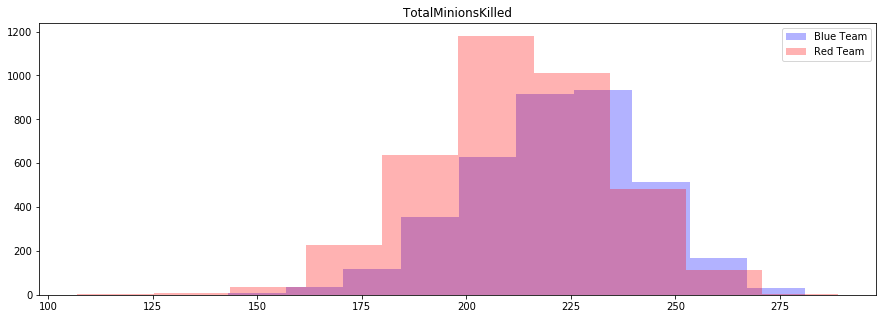

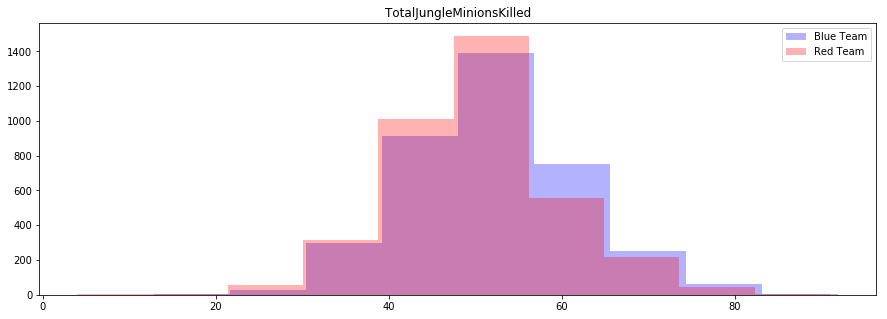

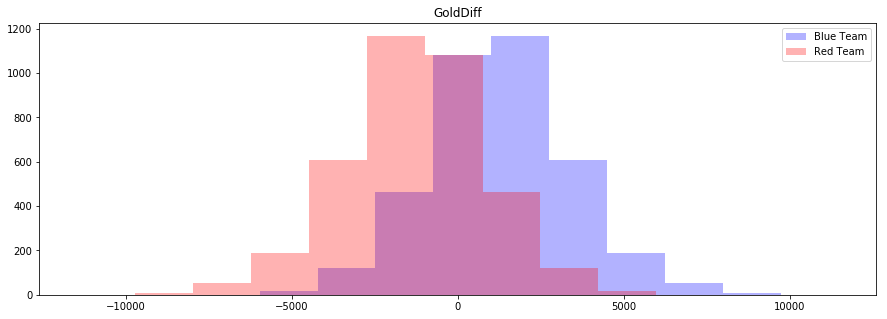

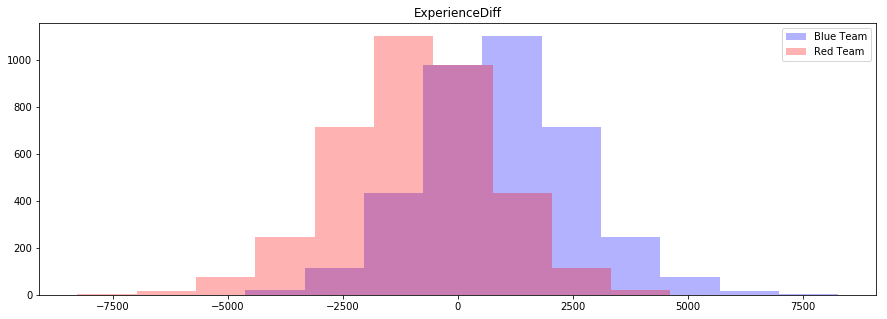

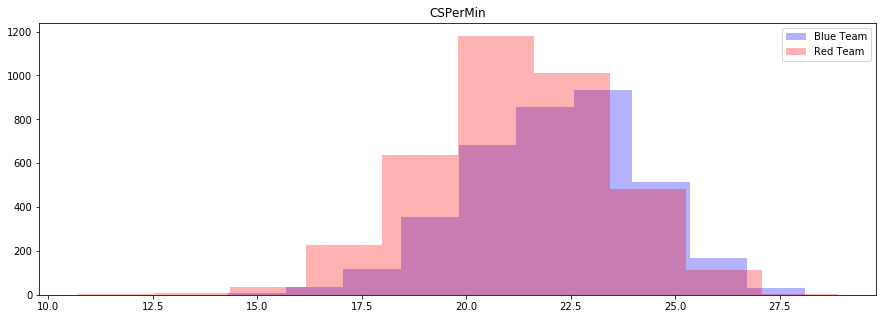

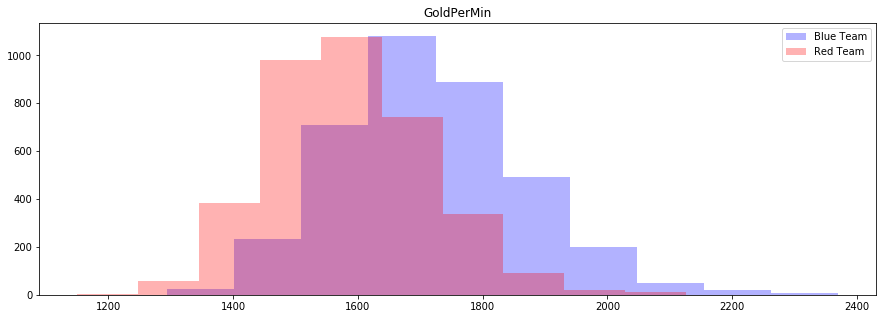

In [12]:
for col1 in blue.columns:
    if col1.startswith("blue"):
        for col2 in blue.columns:
            if col2 == "red" + col1[4:]:
                plt.figure(figsize=(15, 5))
                plt.hist(blue[col1], color="Blue", label="Blue Team", alpha=.3)
                plt.hist(blue[col2], color="Red", label="Red Team", alpha=.3)
                plt.title(col1[4:])
                plt.legend()
                plt.show()

It seems kills, deaths, and total gold are very important. Gold is much more important than experiance